### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [8]:
# Trace 
a = np.tile(np.arange(1,11),(10,1))
A = np.asarray( [a[j]*(j+1) for j in range(10) ] )
print("Matrice dei prodotti tra i primi 10 interi (a.k.a. tabelline): \n", A)

trace = np.sum(np.diag(A))
print("\n\nLa traccia della matrice A è: Tr(A) = ", trace)

# antidiagonale
antiDiag = np.diag( np.flip(A,0) )
print("\n\nAntiDiagonale della matrice: \n", antiDiag)

# diag con offset +1
diagOffsetOne = np.diag(A,1)
print("\n\nDiagonale con offset +1: \n", diagOffsetOne)


Matrice dei prodotti tra i primi 10 interi (a.k.a. tabelline): 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


La traccia della matrice A è: Tr(A) =  385


AntiDiagonale della matrice: 
 [10 18 24 28 30 30 28 24 18 10]


Diagonale con offset +1: 
 [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [18]:
dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distT = dist.reshape(dist.shape[0],1)

distTab = abs(dist - distT)
print("Tabella distanze tra città: \n",distTab)
print("\n\nStessa in km: \n", 1.609344*distTab) # 1.6... è il fattore di conversione

Tabella distanze tra città: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]


Stessa in km: 
 [[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072 3939.674112]
 [ 318.650112    0.        168.98112   865.827072 1083.088512 1572.329088
  2055.132288 2166.177024 2760.02496  3621.024   ]
 [ 487.631232  168.98112     0.        696.845952  914.107392 1403.347968
  1886.151168 1997.195904 2591.04384  3452.04288 ]
 [1184.477184  865.827072  696.845952    0.     

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


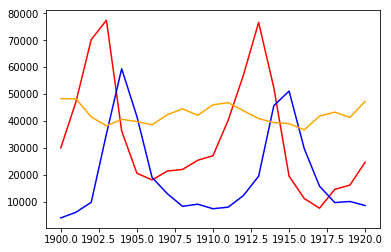

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

rawData = np.loadtxt('populations.dat')
print(rawData)

years = np.array(rawData[:,0], 'uint32')
hares = np.array(rawData[:,1], 'uint32')
lynxs = np.array(rawData[:,2], 'uint32')
carrs = np.array(rawData[:,3], 'uint32')

plt.plot(years, hares, 'r-', years, lynxs, 'b-')
plt.plot(years, carrs, '-', color='orange')
plt.show()

In [4]:
print("Popolazione media di lepri: ", np.mean(hares));
print("Popolazione media di linci: ", np.mean(lynxs));
print("Popolazione media di carote: ", np.mean(carrs));

print("DevStd della popolazione di lepri: ", np.std(hares));
print("DevStd della popolazione di linci: ", np.std(lynxs));
print("DevStd della popolazione di carote: ", np.std(carrs));

print("\n\nCorrelazione tra lepri e linci: \n", np.corrcoef(hares,lynxs))
print("\n\nCorrelazione tra lepri e carote: \n", np.corrcoef(hares,carrs))
print("\n\nCorrelazione tra linci e carote: \n", np.corrcoef(lynxs,carrs))

Popolazione media di lepri:  34080.95238095238
Popolazione media di linci:  20166.666666666668
Popolazione media di carote:  42400.0
DevStd della popolazione di lepri:  20897.906458089667
DevStd della popolazione di linci:  16254.591536908763
DevStd della popolazione di carote:  3322.5062255844787


Correlazione tra lepri e linci: 
 [[1.         0.07189206]
 [0.07189206 1.        ]]


Correlazione tra lepri e carote: 
 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]


Correlazione tra linci e carote: 
 [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]


La dimanica delle popolazioni di lepri (SnowShoe Hare) e linci dipende dal fatto che le prime sono la principale fonte di alimentazione per le seconde, in quanto questa specie di lepri permette alle linci di rimanere in forma fisica adeguata per non soccombere alla fame e alla debolezza, con conseguente pericolo di essere a loro volta predate. Di conseguenza, nel momento in cui le lepri sono presenti in numero sufficiente, la popolazione di linci prolifera. Al contrario, nel momento in cui le lepri scareggiano, le linci devono allargare il campo di ricerca per trovare il nutrimento necessario al loro sostentamento.

D'altra parte, la dinamica della popolazione di lepri è legata alla disponibilità di risorse disponibili nell'ambiente. Una volta che il numero di lepri raggiunge la _capacità portante_, i.e. la quantità asintotica per la quale i fattori di disponibilità di risorse e competizione di individui della medesima specie per tali risorse, questa situazione provoca il rallentamento e quindi l'estinzione della crescita di questa popolazione. Successivamente si assiste al declino (cfr. Figura). La scarsità della popolazione di lepri provoca, per quanto detto prima sulle esigenze nutrizionali delle linci, il declino anche di queste ultime. Si giunge quindi alla situzione in cui entambe le popolazioni sono scarse.

Successivamente, l'ambiente è in grado di ripristinare le condizioni ottimali per la proliferazione delle lepri, data la debole presenza di queste sul territorio. Di conseguenza, con un periodo di 8-11 anni (cfr. sito), la popolazione di lepri assiste a un aumento (una trattazione completa e olistica sull'ecologia di popolazione e comunità è data in E.P. Odum, _Fundamentals of Ecology_).

**Giustificazione Teorica**. Quanto si evince dai dati può essere simulato dal modello di \textbf{LotkaVolterra}, un sistema di due equazioni differenziali ordinarie, aventi come oggetto l'evoluzione delle variabili $x(t)$, $y(t)$, rispettivamente le due popolazioni. Queste equazioni sono


\begin{cases}
        \frac{dx}{dt} = \left( A - By \right) x \\
        \frac{dy}{dt} = \left( Cx - D \right) y 
\end{cases}


Notiamo che mentre questo sistema coinvolge solo le serie temporali di lepri e linci, l'informazione della disponibilità di risorse è trascurata, quindi replicando un'analisi statistica per il risultato della simulazione di questo modello, l'effetto dell'ambiente non è preso in considerazione, quindi la crescita della popolazione delle lepri è imputata unicamente alla scarsità della presenza del predatore. 